---
# <font color="#CA3532">IPCV Part III miniproject 2</font>
---

Last updated on 2020-05-21


---

*SESSION 1: *

- This assingment is centered in the use of [Keras](https://keras.io/)

- Keras is an open-source neural-network library. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

- Keras itself can work using different motors. We will use it with TensorFlow under the hood.

- We will analyze the vanishing gradient problem and initialization methods together with other optimization methods.


In [1]:
# TO-DO: Include your names and NIAs here:
student_data = [{'name': 'Mohamed Hassan', 'nia': 'NIA of 1st student'},
                {'name': 'Sebastian Cajas','nia': 'NIA of 2nd student'}]

### <font color="#CA3532">Import the libraries</font>

TensorFlow officially included Keras, so if you have TensorFlow, you have keras!

In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [3]:
!git clone https://github.com/luisferuam/DLFBT-LAB
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

Cloning into 'DLFBT-LAB'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 99 (delta 49), reused 71 (delta 24), pack-reused 0
Unpacking objects: 100% (99/99), done.


### <font color="#CA3532">Data set</font>


In [22]:
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names

dataset = np.loadtxt(dataset_url, delimiter=',')

# Split database in atributtes and classes
print("dataset  shape =", dataset.shape)
#-------------------------------------------------------------------------------
# TO-DO block: Divide attributes and classes/labels. Store the numer of atrributes
#-------------------------------------------------------------------------------
x = dataset[:,:-1]
y = dataset[:,-1:]
x_size = x.shape
print("features shape =", x.shape)
print("labels   shape =", y.shape)
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

dataset  shape = (5404, 6)
features shape = (5404, 5)
labels   shape = (5404, 1)


In [5]:
# Final result with the classes stored in y
print(x_size)
print(x)
print(y)

(5404, 5)
[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [6]:
np.unique(y)

array([0., 1.])

In [23]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### <font color="#CA3532">Defining our model</font>

- From the input to the output in keras we can define the properties of each laye (size, activation function, connectivity topology...) with the sequential mode.

- In this case we are going to create our basic multilayer feedforward network



In [8]:
# Define the model using keras
nn = Sequential()

#-------------------------------------------------------------------------------
# TO-DO block: Add fully connected layers to create a MLP like in assignment 1
#-------------------------------------------------------------------------------
input_size = 5
output_size = 1
hidden_layer_size = 100

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size, input_dim=input_size,activation="relu"),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='sigmoid')
])
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

### <font color="#CA3532">Compile the network</font>

- Compile is the step where our network is created

- Here we have to define different aspects involved in the trainning of the network

- In each section you have an URL to the official documentation. Take a look at the availability of different strategies in each case.

- It is possible to also define your own functions for this.

### <font color="#CA3532"> Optimizer </font>

Strategy to calculate the weights corrections

https://keras.io/api/optimizers/


### <font color="#CA3532"> Loss function </font>

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

https://keras.io/api/losses/

### <font color="#CA3532"> Metrics (results) </font>

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

https://keras.io/api/metrics/


### <font color="#CA3532"> Initialization </font>

Initializers define the way to set the initial weights weights of your network layers.

https://keras.io/api/layers/initializers/



In [ ]:
# Compile

#-------------------------------------------------------------------------------
# TO-DO block: Compile your network, to reproduce the assignment 1 MLP
#-------------------------------------------------------------------------------
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
nn.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

### <font color="#CA3532">Train the network</font>

The Fit method trains the network according to the data.

Here we introduce all the data together and select a 20% of the data for validation purposes.

Other ways to do this are allowed, including the optimization of the parameters.

https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
tf.keras.backend.set_floatx('float64')

In [ ]:
# Fit
history = nn.fit(x, y, epochs=500, verbose=2, validation_split=0.2)

# Fit
#history = nn.fit(x, y, epochs=500, verbose=0, validation_split=0.2)

Epoch 1/500
136/136 - 4s - loss: 0.6276 - accuracy: 0.7030 - val_loss: 0.6153 - val_accuracy: 0.7206
Epoch 2/500
136/136 - 0s - loss: 0.6143 - accuracy: 0.7030 - val_loss: 0.6020 - val_accuracy: 0.7206
Epoch 3/500
136/136 - 0s - loss: 0.6032 - accuracy: 0.7030 - val_loss: 0.5912 - val_accuracy: 0.7206
Epoch 4/500
136/136 - 0s - loss: 0.5942 - accuracy: 0.7030 - val_loss: 0.5819 - val_accuracy: 0.7206
Epoch 5/500
136/136 - 0s - loss: 0.5865 - accuracy: 0.7030 - val_loss: 0.5741 - val_accuracy: 0.7206
Epoch 6/500
136/136 - 0s - loss: 0.5800 - accuracy: 0.7030 - val_loss: 0.5674 - val_accuracy: 0.7206
Epoch 7/500
136/136 - 0s - loss: 0.5745 - accuracy: 0.7030 - val_loss: 0.5617 - val_accuracy: 0.7206
Epoch 8/500
136/136 - 0s - loss: 0.5697 - accuracy: 0.7030 - val_loss: 0.5569 - val_accuracy: 0.7206
Epoch 9/500
136/136 - 0s - loss: 0.5656 - accuracy: 0.7030 - val_loss: 0.5526 - val_accuracy: 0.7206
Epoch 10/500
136/136 - 0s - loss: 0.5619 - accuracy: 0.7030 - val_loss: 0.5487 - val_accura

In [ ]:
# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just considering 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Also, the predict method is available to classify unlabeled data

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,831
Trainable params: 10,831
Non-trainable params: 0
_________________________________________________________________



169/169 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8101
Accuracy: 81.01


### <font color="#CA3532">Plot data</font>

- History object saves the different epoch data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


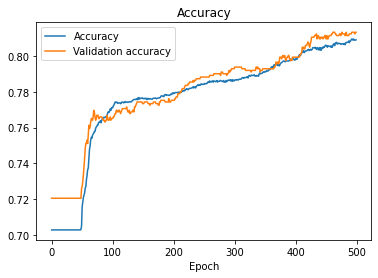

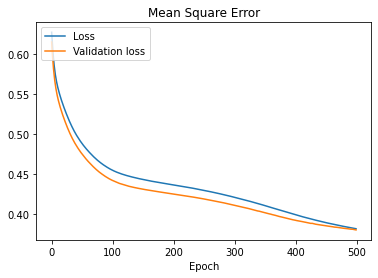

In [ ]:
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

#-------------------------------------------------------------------------------
# TO-DO block: Explain what you observe
#-------------------------------------------------------------------------------
# Using a small number of neurons in the hidden layer (~= input layer)
When using a small number of neurons, smaller/equal than the input layer, the accuracy is not very high unless the number of epochs is increased. Using a 5 neurons for example and 5 epochs, the accuracy remains stable at 66%, while if the epochs is increased to 500, the accuracy increases up to 88%. From a bigger number of epochs we can also observe a smoother plot
# Using a big number of neurons in the hidden layer (>> input layer)

There will be overfitting, increasing the number of layers up to 500 and 8 layers depth, of almost a 6%. 

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

### <font color="#CA3532">Optimize the network design</font>

- Change the network architecture, introducing more layers and neurons to obtain a better result. You can:
 - Add more and different type of layers
 - Change the activation funcions
 - Change the loss / optimizer
 - Change your initialization




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


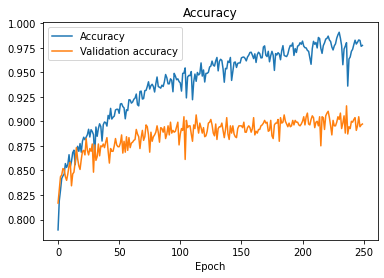

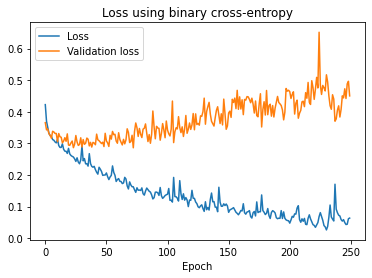

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               3000      
_________________________________________________________________
dense_15 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_16 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_17 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [8]:

from keras.optimizers import SGD
#-------------------------------------------------------------------------------
# TO-DO block: Include your code below
#-------------------------------------------------------------------------------
input_size = 5
output_size = 1
hidden_layer_size = 500

nn = tf.keras.Sequential([ # Sequential means a linear stack of layers
    tf.keras.layers.Dense(hidden_layer_size,input_dim=5,activation='relu', kernel_initializer='he_uniform'), # layer, dim input, act
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='tanh'),
    tf.keras.layers.Dense(output_size,activation='sigmoid')
])

opt = SGD(lr=0.01, momentum=0.9)

nn.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------

# Fit
history = nn.fit(x, y, epochs=250, verbose=0, validation_split=0.2)

# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss using binary cross-entropy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# <font color="#CA3532">SESSION 2</font>


### <font color="#CA3532">Dataset input</font>


In [28]:
# Load here your selected dataset considering input and output dimensions
import tensorflow_datasets as tfsd
mnist_dataset,mnist_info=tfsd.load(name='mnist',with_info=True, as_supervised=True, shuffle_files=True)

In [29]:
mnist_train,mnist_test = mnist_dataset['train'],mnist_dataset['test']
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

In [32]:
def scale(image,label):
    image=tf.cast(image,tf.float32)
    image/=255.
    return image,label

scaled_train_and_validation_data=mnist_train.map(scale)
scaled_test_data = mnist_test.map(scale)

BUFFER_SIZE=10000
BATCH_SIZE=300
input_size = 784
output_size = 10
hidden_layer_size = 300
hidden_layer_size2 = 150
hidden_layer_size2 = 150
hidden_layer_size2 = 150

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

train_data=train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

### <font color="#CA3532">Standar choice</font>

- Evaluate the training with a standard choice of cost and activation functions, learning rate, weight initialization and network topology.
- Generate the loss and accuracy figures

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 10
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

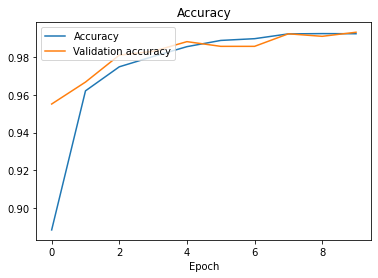

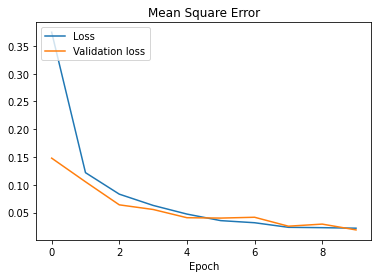

1/1 [==============================] - 1s 1s/step - loss: 0.0765 - accuracy: 0.9807
Accuracy: 98.07


In [34]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Optimizations</font>

- Evaluate each of the following optimization methods using the same representation and the duration of the training in terms of epochs to reach a choice of error and also in terms of time taken.

 a) Regularization

 b) Dropout

 c) Stochastic gradient descent

 d) Momentum  (including Nesterov version)

 e) AdaGrad

 f) RMSProp

 g) Adam

 h) Optimize

In [ ]:
# a) Regularization 
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

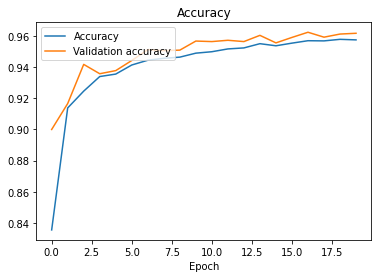

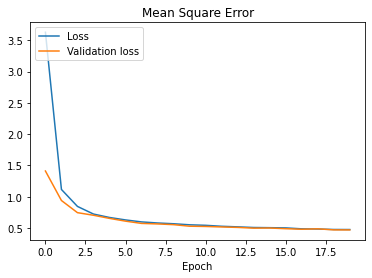

1/1 [==============================] - 0s 433ms/step - loss: 0.4708 - accuracy: 0.9587
Accuracy: 95.87


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# b) Dropout
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

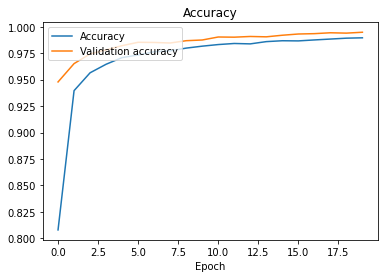

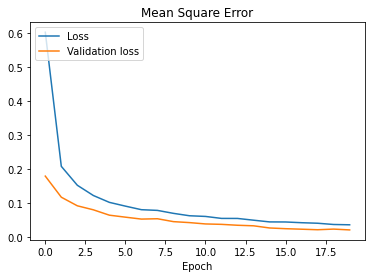

1/1 [==============================] - 0s 446ms/step - loss: 0.0735 - accuracy: 0.9808
Accuracy: 98.08


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# c) Stochastic gradient descent
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

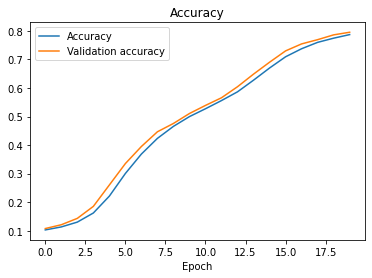

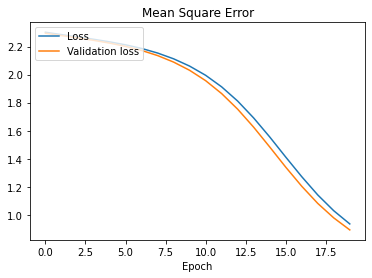

1/1 [==============================] - 0s 451ms/step - loss: 0.8719 - accuracy: 0.8014
Accuracy: 80.14


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# d) Momentum  (including Nesterov version)
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

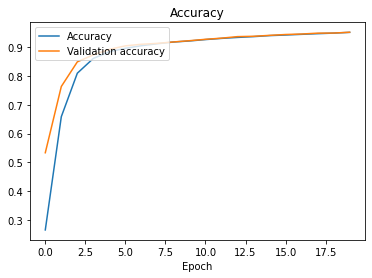

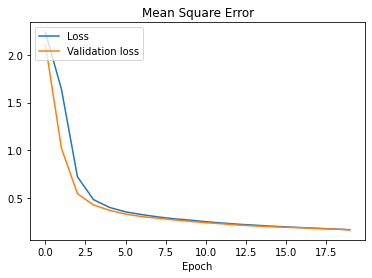

1/1 [==============================] - 0s 442ms/step - loss: 0.1690 - accuracy: 0.9511
Accuracy: 95.11


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# e) AdaGrad
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

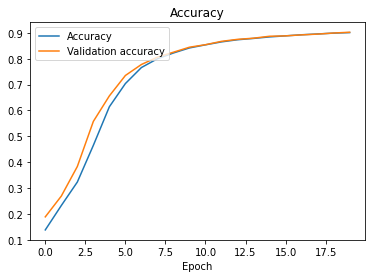

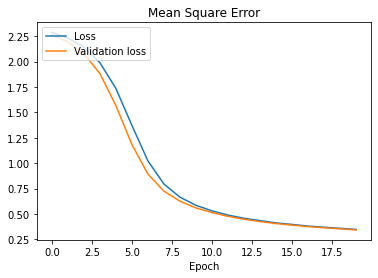

1/1 [==============================] - 0s 426ms/step - loss: 0.3358 - accuracy: 0.9017
Accuracy: 90.17


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# f) RMSProp
# Code

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

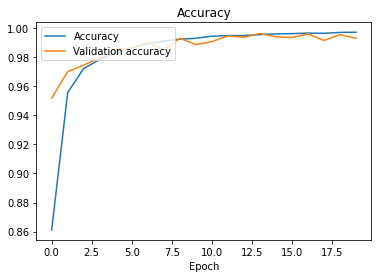

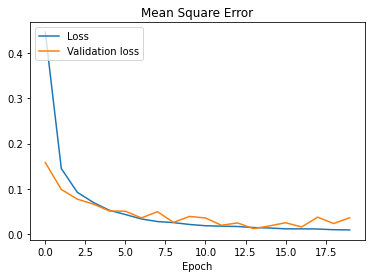

1/1 [==============================] - 0s 455ms/step - loss: 0.1286 - accuracy: 0.9809
Accuracy: 98.09


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# g) Adam
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

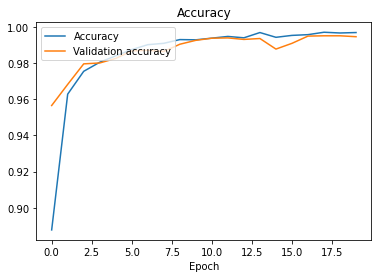

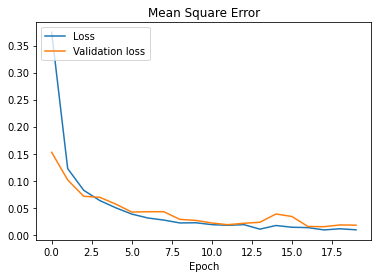

1/1 [==============================] - 0s 433ms/step - loss: 0.0895 - accuracy: 0.9799
Accuracy: 97.99


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#  h) Optimize
# Code
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

NUM_EPOCHS= 20
history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)

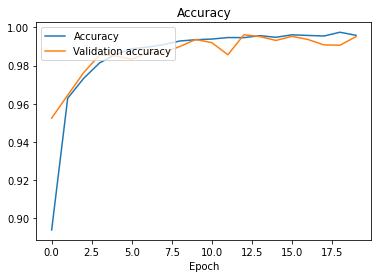

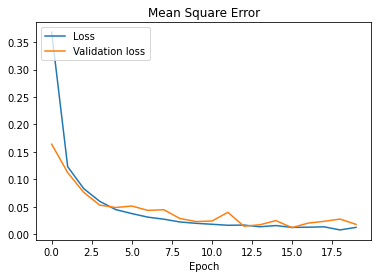

1/1 [==============================] - 0s 440ms/step - loss: 0.1051 - accuracy: 0.9797
Accuracy: 97.97


In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

### <font color="#CA3532">Implement parallelization in Keras with the best optimization</font>






*   Run tests for GPU presence

*   Use your best implementation from the previous exercise here and compare the training time both with GPUs and without GPUs.

Comment all your results.





In [23]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.16.57.162:8470']


INFO:tensorflow:Initializing the TPU system: grpc://10.16.57.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.16.57.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


## Guess the year comparason with CPU - GPU - TPU 

Epoch 1/5
5/5 [==============================] - 1s 180ms/step - loss: 0.6256 - accuracy: 0.6773 - val_loss: 0.5084 - val_accuracy: 0.7206
Epoch 2/5
5/5 [==============================] - 1s 132ms/step - loss: 0.5008 - accuracy: 0.7288 - val_loss: 0.4527 - val_accuracy: 0.7956
Epoch 3/5
5/5 [==============================] - 1s 137ms/step - loss: 0.4515 - accuracy: 0.7943 - val_loss: 0.4290 - val_accuracy: 0.7882
Epoch 4/5
5/5 [==============================] - 1s 134ms/step - loss: 0.4370 - accuracy: 0.7824 - val_loss: 0.4119 - val_accuracy: 0.8057
Epoch 5/5
5/5 [==============================] - 1s 132ms/step - loss: 0.4033 - accuracy: 0.8123 - val_loss: 0.3996 - val_accuracy: 0.8020
4.068118333816528
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


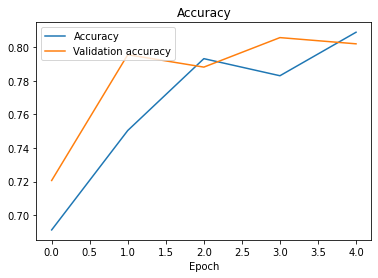

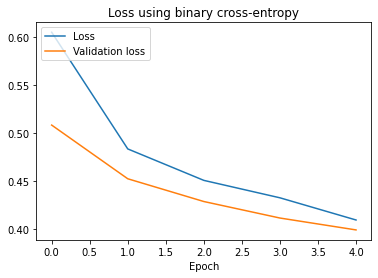

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 500)               3000      
_________________________________________________________________
dense_77 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_78 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_79 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_80 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_81 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_82 (Dense)             (None, 1)               

In [26]:
input_size = 5
output_size = 1
hidden_layer_size = 500

nn = tf.keras.Sequential([ # Sequential means a linear stack of layers
    tf.keras.layers.Dense(hidden_layer_size,input_dim=5,activation='relu', kernel_initializer='he_uniform'), # layer, dim input, act
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='tanh'),
    tf.keras.layers.Dense(output_size,activation='sigmoid')
])

opt = SGD(lr=0.01, momentum=0.9)

nn.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

#-------------------------------------------------------------------------------
# End of TO-DO block 
#-------------------------------------------------------------------------------
import time

s = time.time()
# Fit
history = nn.fit(x, y, epochs=5,batch_size=1024, verbose=1, validation_split=0.2)
e = time.time()

print(e - s)
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss using binary cross-entropy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
nn.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = nn.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

# Computational time between CPU - GPU - TPU for best model - guess the year dataset

## Epoch time

$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{CPU} & \textbf{GPU} & \textbf{TPU}  \\
 256 & 5.038s & 1.60s & 1.63s\\  
 512 & 4.430s & 1.35s & 1.98s\\
 1024 & 4.06s & 1.258s & 1.635s\\
\end{array}\right]$$

## Step time per epoch


$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{CPU} & \textbf{GPU} & \textbf{TPU}  \\
 256 & 1s/51 \mu s &  0s/14\mu s & 1s/22\mu s \\  
 512 & 1s/80 \mu  s& 0s/14 \mu s & 1s/24\mu s \\
 1024 & 1s/133 \mu s & 0s/19 \mu s & 0/ 42\mu s\\ 
\end{array}\right]$$

## Mnist comparason with CPU - GPU

The computation time was:  98.12066292762756
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


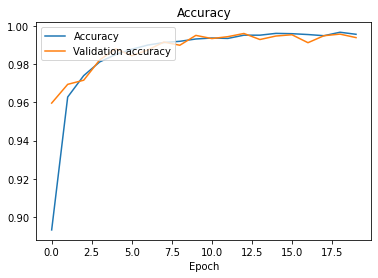

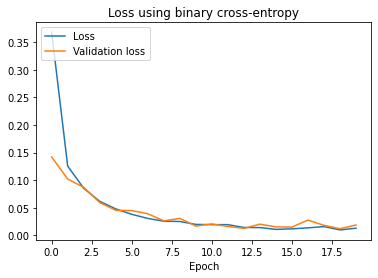

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_107 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_108 (Dense)            (None, 150)               45150     
_________________________________________________________________
dense_109 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_110 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_111 (Dense)            (None, 150)               22650     
_________________________________________________________________
dense_112 (Dense)            (None, 10)              

In [35]:
from keras.optimizers import SGD
import timeit
import time

#from tensorflow.contrib.tpu.python.tpu import keras_support

def get_model():

  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size2,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
    ])

  opt = keras.optimizers.Nadam(learning_rate=0.001)
  model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


  return model
# End of TO-DO block 
#-------------------------------------------------------------------------------
model = get_model()

NUM_EPOCHS= 20
s = time.time()
history = model.fit(train_data,epochs=NUM_EPOCHS,
          batch_size=256,
         validation_data=(validation_inputs, validation_targets),verbose=0)

#history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs, validation_targets),verbose=0)
e = time.time()

print("The computation time was: ", e - s)
# Plot history

print(history.history.keys())

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss using binary cross-entropy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Network details
model.summary()
print('\n\n')

# Evaluate (similar to fit but just 1 epoch iteration without changing the network)
loss, accuracy = model.evaluate(test_data)
print('Accuracy: %.2f' % (accuracy*100))

# Computational time between CPU - GPU - TPU for best model - MNIST model

## Epoch time

$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{CPU} & \textbf{GPU}  \\
 256 & 104.6067s & 75.24s \\  
 512 & 102s & 74.6s \\
 1024 & 103.75s & 80.05s \\
\end{array}\right]$$

## Step time per epoch


$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{CPU} & \textbf{GPU}   \\
 256 & 5.2s/25.5 \mu s & 4s/17 \mu s \\  
 512 & 5.1s/24 \mu  s& 4s/17 \mu s \\
 1024 & 5s/24 \mu s & 4s /17 \mu s\\
\end{array}\right]$$



### <font color="#CA3532">Convolutional Neural Networks</font>

Implement a convolutional neural network and apply it to classify the images of the CIFAR-10 dataset. The network should have at least the following characteristics:

    Convolutional layers.
    Pooling layers.
    Some regularization mechanism, such as dropout or L2 regularization.
    Batch normalization layers.

The network should obtain at least 75% accuracy on the test set.

In [ ]:
#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(train_images.shape)
print(train_labels.shape)
for t in train_labels[:10]:
  print(t[0], class_names[t[0]])

print(test_images.shape)
print(test_labels.shape)
for t in test_labels[:10]:
  print(t[0], class_names[t[0]])

(50000, 32, 32, 3)
(50000, 1)
6 frog
9 truck
9 truck
4 deer
1 automobile
1 automobile
2 bird
7 horse
8 ship
3 cat
(10000, 32, 32, 3)
(10000, 1)
3 cat
8 ship
8 ship
0 airplane
6 frog
6 frog
1 automobile
6 frog
3 cat
1 automobile


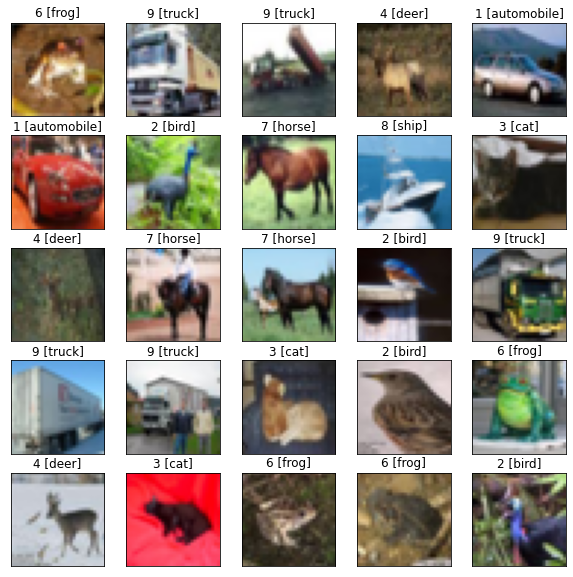

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title("%d [%s]" % (train_labels[i][0], class_names[train_labels[i][0]]))

In [ ]:
train_images.mean(axis=0).shape

(32, 32, 3)

Normalization: Data - column-wise mean

In [ ]:
train_images_orig = train_images
test_images_orig = test_images
mean_img = train_images.mean(axis=0) # axis 0 (columns), axis 1 (rows) -> shape is (32, 32, 3) 
train_images = train_images - mean_img
test_images = test_images - mean_img

Hot encoding labels

In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, 10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, 10)
train_labels_one_hot[1:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Fully connected network 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             rotation_range=15, 
                             horizontal_flip=True)

iter = datagen.flow(train_images_orig[:10], train_labels[:10], batch_size=10)

In [ ]:
K.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 3)))

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))   

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=2))  

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1.e-3), loss='categorical_crossentropy', metrics=['acc'])
iter = datagen.flow(train_images, train_labels_one_hot, batch_size=1000)

nepochs = 50
history = model.fit(iter, 
                    epochs=nepochs, 
                    steps_per_epoch=50,
                    validation_data=(test_images, test_labels_one_hot))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

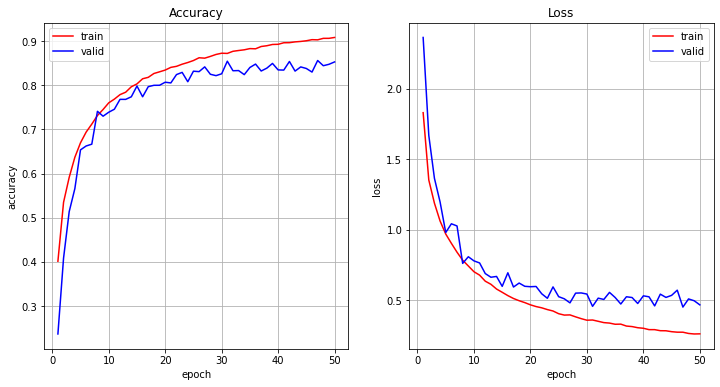

In [ ]:
plot_training_curves(history.history)